# SENTIMENT ANALYSIS OF FINANCIAL NEWS
#### 2 DATASETS: news and tweets
Both datasets have already been filtered and structured into two different dataframes

Structure of this notebook:
- data cleaning
- data exploration
  - LDA model (generic)

In [5]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth',None)

In [7]:
news=pd.read_csv('TUTTE_NEWS_clean.csv', sep=';')
news

date  \
0      2020-01-01   
1      2020-01-01   
2      2020-01-01   
3      2020-01-01   
4      2020-01-01   
...           ...   
74993  2020-08-28   
74994  2020-08-28   
74995  2020-08-28   
74996  2020-08-28   
74997  2020-08-28   

                                                                                             headline  
0                                2020 Predictions: No Rate Cuts, No Recession, Sell Apple, Buy Energy  
1                                 3 Reasons Why Growth Investors Shouldn't Overlook Fair Isaac (FICO)  
2                                     3 Tech Giants That Could Benefit From The 5G Revolution In 2020  
3                                             ACA or CBPX: Which Is the Better Value Stock Right Now?  
4                              All You Need to Know About Alexion (ALXN) Rating Upgrade to Strong Buy  
...                                                                                               ...  
74993   Weyland Tech assumes the name of its subsidiary, Logiq, emerges strong for its customer data   
74994                         Whipsaw action in gold resolves to the upside, with $2K again in sight   
74995                                  White House interviewing replacements for FTC head - Politico   
74996                                    Workhorse drops on reported HorseFly drone flaws - Barron's   
74997                                                   Yiren Digital -6.5% on depressing Q2 numbers   

[74998 rows x 2 columns]

In [300]:
tweets=pd.read_csv('tweets/TUTTI_TWEETS_raw.csv')

In [301]:
tweets.sort_values(by='date')

date     username  \
8863   2020-01-01    cyberalgo   
8881   2020-01-01    cyberalgo   
8882   2020-01-01    cyberalgo   
8883   2020-01-01    cyberalgo   
8885   2020-01-01    cyberalgo   
...           ...          ...   
82566  2020-08-30  Trader_K111   
82567  2020-08-30       GFXFTs   
82568  2020-08-30        uclfx   
82555  2020-08-30   CycleWave2   
82569  2020-08-30  Trader_K111   

                                                                                                                                                                                                                                                                                       text  
8863                              Daily Sentiment on Wed Jan 01 at 22:30 GMT | All pairs\n#usdjpy #usdcad #usdchf #audusd #eurusd #gbpusd #nzdusd #audjpy #eurjpy #gbpjpy #euraud #btcusd #xagusd #xptusd #xauusd #nas100 #usb10y #spx500 \n#trading #forex #trends https://t.co/n3oAGtAikN  
8881                                                                       #SP500 | SP 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE | 138741\n\nCommitments of Traders (CoT) Legacy Report\nTuesday, 24 of December of 2019\n\n#CoTReport #COTIndex #CFTC #Futures https://t.co/L63Yt1lAlX  
8882                                                          CoT Index\n\n#SP500 | SP 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE | 138741\n\nCommitments of Traders (CoT) Legacy Report\nTuesday, 24 of December of 2019\n\n#CoTReport #COTIndex #CFTC #Futures https://t.co/NBXxvidwXR  
8883                                                                Long vs Short\n\n#SP500 | SP 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE | 138741\n\nCommitments of Traders (CoT) Legacy Report\nTuesday, 24 of December of 2019\n\n#CoTReport #CFTC #Futures https://t.co/K0D6U0gQkx  
8885                              Daily Sentiment on Wed Jan 01 at 18:30 GMT | All pairs\n#usdjpy #usdcad #usdchf #audusd #eurusd #gbpusd #nzdusd #audjpy #eurjpy #gbpjpy #euraud #btcusd #xagusd #xptusd #xauusd #nas100 #usb10y #spx500 \n#trading #forex #trends https://t.co/Lu4hN66Gip  
...                                                                                                                                                                                                                                                                                     ...  
82566                                                                                                      Heads-up on this beautiful pattern here on $MS \n(ascending triangle )\nMORGAN STANLEY\nNYSE\nMS\n#NASDAQ \n#SP500 \n#stockstowatch\n#StocksToTrade\n#MS https://t.co/PAv5TBYJ81  
82567                                                                                                                                                                                                             Contrarian Watch Part II #SPX #VIX #RISK #fintwit https://t.co/1ZGQ8HnKER  
82568                                                                                                                                                       @NorthmanTrader @FT Might still be a little room for more, but we’re in the window\n\n#SPX500 #spx #QQQ https://t.co/Gdl7i8yvb0  
82555                           S&amp;P500 $SPX #SPX $ES_F -  Possible #Elliottwave analysis - \n\nJoin CycleWave for free to get more #Elliottwave trade ideas on forex, cryptos, commodities, futures indices and global stock markets at https://t.co/Lm78pMdMOx https://t.co/rUyqhaNArh  
82569  Do you remember this chart two weeks ago on $AMZN ,\nwe'v made +7% profit on the nice pattern . I sold my position on Friday although it has the room for more +% but i got what i want out of it.\n#AMZN\n#NASDAQ \n#SP500 \n#stockstowatch\n#StocksToTrade https://t.co/Vw2GTSBGGF  

[92432 rows x 3 columns]

In [270]:
tweets['date'] = pd.to_datetime(tweets['date'])
tweets.sort_values(by='date')

date     username  \
8863  2020-01-01    cyberalgo   
8881  2020-01-01    cyberalgo   
8882  2020-01-01    cyberalgo   
8883  2020-01-01    cyberalgo   
8885  2020-01-01    cyberalgo   
...          ...          ...   
82566 2020-08-30  Trader_K111   
82567 2020-08-30       GFXFTs   
82568 2020-08-30        uclfx   
82555 2020-08-30   CycleWave2   
82569 2020-08-30  Trader_K111   

                                                                                                                                                                                                                                                                                       text  
8863                              Daily Sentiment on Wed Jan 01 at 22:30 GMT | All pairs\n#usdjpy #usdcad #usdchf #audusd #eurusd #gbpusd #nzdusd #audjpy #eurjpy #gbpjpy #euraud #btcusd #xagusd #xptusd #xauusd #nas100 #usb10y #spx500 \n#trading #forex #trends https://t.co/n3oAGtAikN  
8881                                                                       #SP500 | SP 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE | 138741\n\nCommitments of Traders (CoT) Legacy Report\nTuesday, 24 of December of 2019\n\n#CoTReport #COTIndex #CFTC #Futures https://t.co/L63Yt1lAlX  
8882                                                          CoT Index\n\n#SP500 | SP 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE | 138741\n\nCommitments of Traders (CoT) Legacy Report\nTuesday, 24 of December of 2019\n\n#CoTReport #COTIndex #CFTC #Futures https://t.co/NBXxvidwXR  
8883                                                                Long vs Short\n\n#SP500 | SP 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE | 138741\n\nCommitments of Traders (CoT) Legacy Report\nTuesday, 24 of December of 2019\n\n#CoTReport #CFTC #Futures https://t.co/K0D6U0gQkx  
8885                              Daily Sentiment on Wed Jan 01 at 18:30 GMT | All pairs\n#usdjpy #usdcad #usdchf #audusd #eurusd #gbpusd #nzdusd #audjpy #eurjpy #gbpjpy #euraud #btcusd #xagusd #xptusd #xauusd #nas100 #usb10y #spx500 \n#trading #forex #trends https://t.co/Lu4hN66Gip  
...                                                                                                                                                                                                                                                                                     ...  
82566                                                                                                      Heads-up on this beautiful pattern here on $MS \n(ascending triangle )\nMORGAN STANLEY\nNYSE\nMS\n#NASDAQ \n#SP500 \n#stockstowatch\n#StocksToTrade\n#MS https://t.co/PAv5TBYJ81  
82567                                                                                                                                                                                                             Contrarian Watch Part II #SPX #VIX #RISK #fintwit https://t.co/1ZGQ8HnKER  
82568                                                                                                                                                       @NorthmanTrader @FT Might still be a little room for more, but we’re in the window\n\n#SPX500 #spx #QQQ https://t.co/Gdl7i8yvb0  
82555                           S&amp;P500 $SPX #SPX $ES_F -  Possible #Elliottwave analysis - \n\nJoin CycleWave for free to get more #Elliottwave trade ideas on forex, cryptos, commodities, futures indices and global stock markets at https://t.co/Lm78pMdMOx https://t.co/rUyqhaNArh  
82569  Do you remember this chart two weeks ago on $AMZN ,\nwe'v made +7% profit on the nice pattern . I sold my position on Friday although it has the room for more +% but i got what i want out of it.\n#AMZN\n#NASDAQ \n#SP500 \n#stockstowatch\n#StocksToTrade https://t.co/Vw2GTSBGGF  

[92432 rows x 3 columns]

In [274]:
tweets=tweets.drop(columns='index')

In [276]:
tweets = tweets.set_index('date')

In [284]:
tweets.sort_index()

username  \
date                      
2020-01-01    cyberalgo   
2020-01-01    cyberalgo   
2020-01-01    cyberalgo   
2020-01-01    cyberalgo   
2020-01-01    cyberalgo   
...                 ...   
2020-08-30  Trader_K111   
2020-08-30       GFXFTs   
2020-08-30        uclfx   
2020-08-30   CycleWave2   
2020-08-30  Trader_K111   

                                                                                                                                                                                                                                                                                            text  
date                                                                                                                                                                                                                                                                                              
2020-01-01                             Daily Sentiment on Wed Jan 01 at 22:30 GMT | All pairs\n#usdjpy #usdcad #usdchf #audusd #eurusd #gbpusd #nzdusd #audjpy #eurjpy #gbpjpy #euraud #btcusd #xagusd #xptusd #xauusd #nas100 #usb10y #spx500 \n#trading #forex #trends https://t.co/n3oAGtAikN  
2020-01-01                                                                      #SP500 | SP 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE | 138741\n\nCommitments of Traders (CoT) Legacy Report\nTuesday, 24 of December of 2019\n\n#CoTReport #COTIndex #CFTC #Futures https://t.co/L63Yt1lAlX  
2020-01-01                                                         CoT Index\n\n#SP500 | SP 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE | 138741\n\nCommitments of Traders (CoT) Legacy Report\nTuesday, 24 of December of 2019\n\n#CoTReport #COTIndex #CFTC #Futures https://t.co/NBXxvidwXR  
2020-01-01                                                               Long vs Short\n\n#SP500 | SP 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE | 138741\n\nCommitments of Traders (CoT) Legacy Report\nTuesday, 24 of December of 2019\n\n#CoTReport #CFTC #Futures https://t.co/K0D6U0gQkx  
2020-01-01                             Daily Sentiment on Wed Jan 01 at 18:30 GMT | All pairs\n#usdjpy #usdcad #usdchf #audusd #eurusd #gbpusd #nzdusd #audjpy #eurjpy #gbpjpy #euraud #btcusd #xagusd #xptusd #xauusd #nas100 #usb10y #spx500 \n#trading #forex #trends https://t.co/Lu4hN66Gip  
...                                                                                                                                                                                                                                                                                          ...  
2020-08-30                                                                                                      Heads-up on this beautiful pattern here on $MS \n(ascending triangle )\nMORGAN STANLEY\nNYSE\nMS\n#NASDAQ \n#SP500 \n#stockstowatch\n#StocksToTrade\n#MS https://t.co/PAv5TBYJ81  
2020-08-30                                                                                                                                                                                                             Contrarian Watch Part II #SPX #VIX #RISK #fintwit https://t.co/1ZGQ8HnKER  
2020-08-30                                                                                                                                                       @NorthmanTrader @FT Might still be a little room for more, but we’re in the window\n\n#SPX500 #spx #QQQ https://t.co/Gdl7i8yvb0  
2020-08-30                           S&amp;P500 $SPX #SPX $ES_F -  Possible #Elliottwave analysis - \n\nJoin CycleWave for free to get more #Elliottwave trade ideas on forex, cryptos, commodities, futures indices and global stock markets at https://t.co/Lm78pMdMOx https://t.co/rUyqhaNArh  
2020-08-30  Do you remember this chart two weeks ago on $AMZN ,\nwe'v made +7% profit on the nice pattern . I sold my position on Friday although it has the room for more 

#### DATA CLEANING FOR 'tweets' dataset

In [81]:
# Remove emails and newline characters from tweets.text

In [286]:
# Convert to list
data = tweets.text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove links
data = [re.sub(r'https?:\/\/.*[.html]*', '', sent, flags=re.MULTILINE) for sent in data]
data = [re.sub(r'http?:\/\/.*[.html]*', '', sent, flags=re.MULTILINE) for sent in data]


# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'"," ", sent) for sent in data]

data = [re.sub("\."," ", sent) for sent in data]

# remove code between tags {noformat}
data = [re.sub(r'{noformat}.*[{noformat}]*', '', sent) for sent in data]

data = [sent.lower() for sent in data]
data = [re.sub("-"," ", sent) for sent in data]

tweets.text = data

In [287]:
#remove emoji
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

tweets.text = tweets.text.apply(remove_emojis)

In [288]:
#remove @users
tweets.text = [re.sub("@[A-Za-z0-9_]+","", sent) for sent in tweets.text]

In [85]:
#remove $word
#tweets.text = [re.sub(r"\$[A-Za-z0-9_]","", str(sent)) for sent in tweets.text]

In [86]:
#remove numbers - removes pure int but not percentages eg. 5% or 10,000
tweets.text = [re.sub("^\d+\s|\s\d+\s|\s\d+$", "", s) for s in tweets.text]

In [289]:
#remove '&amp'
tweets.text = [re.sub('&amp', '&', sent) for sent in tweets.text]

In [88]:
#remove meaningless words
#tweets.text = [re.sub('py', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('ix', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('wm', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('old', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('jia', '', sent) for sent in tweets.text]
tweets.text = [re.sub('s1=', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('xx', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('lt', '', sent) for sent in tweets.text]
tweets.text = [re.sub('s3=', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('#', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('qq', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('vix', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('vxy', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('s_f', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('px', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('dx', '', sent) for sent in tweets.text]
#tweets.text = [re.sub('gmt | all pairs', '', sent) for sent in tweets.text]

In [290]:
#remove | char
tweets.text = [re.sub('\|', ' ', sent) for sent in tweets.text]
tweets.text

date
2020-01-31                                                                                                                                    s&;p 500 march 6, 2009 low: 666 79 s&;p 500 ath january 22, 2020: 3,337 77 666 x 5 = 3,330 666 = mark haines bottom 3337 = corona virus top #spx500 
2020-01-31                                                                                                                                                                                                                                                  $100 00 to $13,218 75 possible in one 
2020-01-31                                                                                                                                                                                                                #spx500 we see 3204         3187 soon very soon !!! more to our members 
2020-01-31                                                                                  #lego #legowestern #legowildwe

In [291]:
#remove all parenthesis
tweets.text = [re.sub(r'[()]', '', sent) for sent in tweets.text]

In [292]:
#remove arabic
tweets.text = [re.sub(r'[\u0621-\u064a\ufb50-\ufdff\ufe70-\ufefc]','',sent) for sent in tweets.text]

In [298]:
tweets['text'] = tweets['text'].astype(str)
tweets.text = [re.sub(',', ' ', sent) for sent in tweets.text] #remove commas because they confuse csv delimitator

In [97]:
#convert all dates in datetime format so that i can extract the month
tweets.date = pd.to_datetime(tweets.date, format='%Y-%m-%d')

In [64]:
#save data
tweets.to_csv( "TUTTI_TWEETS_clean.csv", index=False, encoding='utf-8-sig')

In [180]:
tweets

date       username  \
0      01/01/2020    DanaIsbitts   
1      01/01/2020    bigbear0083   
2      01/01/2020   elliottwaves   
3      01/01/2020  finanzasmania   
4      01/01/2020   TraderSmarts   
...           ...            ...   
68858  03/07/2020     Baronen150   
68859  03/07/2020        bm93100   
68860  03/07/2020  TickwatcherMF   
68861  03/07/2020        bm93100   
68862  03/07/2020   tmacktrading   

                                                                                                                                                                                                                                     text  
0                                                                       as ends and begins, here are some quick observations that i hope will help you stay balanced in your approach to equity investing  #retirement #sp500 #investing   
1                                                                                                                                                                                                                "margin debt" vs #sp500   
2                                                                                                                                                                                                                           #btc #bitcoin  
3                                                                                                           #buffett #berkshire worst performance relative to #sp500 in a decade, notice worst years precede a big fall in the market      
4      #emini #futures #markets #trading #oott $spy #spx500 $qqq $ndx $dia $djia #eurusd #fx #oil #gold #options ts tradeplan for has been posted for thursday january 2,#es_f #nq_f #ym_f #rty_f #6e_f #cl_f #gc_f trials tuesday s rty   
...                                                                                                                                                                                                                                   ...  
68858                                                                                                                               this lil girl is about to make a nice run   #mnst $mnst #nasdaq #sp500 #stockstowatch #stockstotrade   
68859                                                                                                                                                                      this market rally has legs, six strategists say  here’s proof   
68860                      ts tradeplan has been posted for sunday globex   mon aug 31,trials #es_f #nq_f #ym_f #rty_f #6e_f #cl_f #gc_f $es_f #emini #futures #trading #oott #spx $spx $spy $nq_f $cl_f #oil #gold #markets #stockmarket  
68861                                                                                                                                                                                        us market rally may end soon ?   #spx chart   
68862             weekly targets for making regular income from options #cashflow #tna #tqqq #fas #spy #upro #qqq #regular #income #optionstrading #options #etf #nasdaq100 #sp500 #us500 #rut #stocktrading #stockstowatch #stockstobuy   

[68863 rows x 3 columns]

#### DATA EXPLORATION 
Topic/Keyword extraction - WordCloud Visualization etc.

In [134]:
import nltk; 

In [135]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\Giulia\Anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [136]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'java', 'org', 'apache'])

In [221]:
tweets=pd.read_csv('TUTTI_TWEETS_clean.csv', index_col=[0])
tweets

date       username  \
0      01/01/2020    DanaIsbitts   
1      01/01/2020    bigbear0083   
2      01/01/2020   elliottwaves   
3      01/01/2020  finanzasmania   
4      01/01/2020   TraderSmarts   
...           ...            ...   
68858  03/07/2020     Baronen150   
68859  03/07/2020        bm93100   
68860  03/07/2020  TickwatcherMF   
68861  03/07/2020        bm93100   
68862  03/07/2020   tmacktrading   

                                                                                                                                                                                                                                     text  
0                                                                       as ends and begins, here are some quick observations that i hope will help you stay balanced in your approach to equity investing  #retirement #sp500 #investing   
1                                                                                                                                                                                                                "margin debt" vs #sp500   
2                                                                                                                                                                                                                           #btc #bitcoin  
3                                                                                                           #buffett #berkshire worst performance relative to #sp500 in a decade, notice worst years precede a big fall in the market      
4      #emini #futures #markets #trading #oott $spy #spx500 $qqq $ndx $dia $djia #eurusd #fx #oil #gold #options ts tradeplan for has been posted for thursday january 2,#es_f #nq_f #ym_f #rty_f #6e_f #cl_f #gc_f trials tuesday s rty   
...                                                                                                                                                                                                                                   ...  
68858                                                                                                                               this lil girl is about to make a nice run   #mnst $mnst #nasdaq #sp500 #stockstowatch #stockstotrade   
68859                                                                                                                                                                      this market rally has legs, six strategists say  here’s proof   
68860                      ts tradeplan has been posted for sunday globex   mon aug 31,trials #es_f #nq_f #ym_f #rty_f #6e_f #cl_f #gc_f $es_f #emini #futures #trading #oott #spx $spx $spy $nq_f $cl_f #oil #gold #markets #stockmarket  
68861                                                                                                                                                                                        us market rally may end soon ?   #spx chart   
68862             weekly targets for making regular income from options #cashflow #tna #tqqq #fas #spy #upro #qqq #regular #income #optionstrading #options #etf #nasdaq100 #sp500 #us500 #rut #stocktrading #stockstowatch #stockstobuy   

[68863 rows x 3 columns]

## LDA topic model is used for topic/keyword extraction

### Tokenize words and Clean-up text
The sentences look better now, but I want to tokenize each sentence into a list of words, removing punctuations and unneccessary characters altogether.
GENSIM library is used.

In [182]:
data=tweets.text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence).encode('utf-8'), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[:5])


[['as', 'ends', 'and', 'begins', 'here', 'are', 'some', 'quick', 'observations', 'that', 'hope', 'will', 'help', 'you', 'stay', 'balanced', 'in', 'your', 'approach', 'to', 'equity', 'investing', 'retirement', 'sp', 'investing'], ['margin', 'debt', 'vs', 'sp'], ['btc', 'bitcoin'], ['buffett', 'berkshire', 'worst', 'performance', 'relative', 'to', 'sp', 'in', 'decade', 'notice', 'worst', 'years', 'precede', 'big', 'fall', 'in', 'the', 'market'], ['emini', 'futures', 'markets', 'trading', 'oott', 'spy', 'spx', 'qqq', 'ndx', 'dia', 'djia', 'eurusd', 'fx', 'oil', 'gold', 'options', 'ts', 'tradeplan', 'for', 'has', 'been', 'posted', 'for', 'thursday', 'january', 'es_f', 'nq_f', 'ym_f', 'rty_f', 'e_f', 'cl_f', 'gc_f', 'trials', 'tuesday', 'rty']]


In [184]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=250) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=250)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['as', 'ends', 'and', 'begins', 'here', 'are', 'some', 'quick', 'observations', 'that', 'hope', 'will', 'help', 'you', 'stay', 'balanced', 'in', 'your', 'approach', 'to', 'equity', 'investing', 'retirement', 'sp', 'investing']


In [185]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [186]:
nlp = spacy.load("en_core_web_sm")

In [187]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [190]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# # Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['end', 'begin', 'quick', 'observation', 'hope', 'help', 'stay', 'balanced', 'approach', 'equity', 'invest', 'retirement', 'sp', 'investing']]


Create the Dictionary and Corpus needed for Topic Modeling

The two main inputs to the LDA topic model are the dictionary(`id2word`) and the corpus

In [191]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]]


In [192]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('approach', 1),
  ('balanced', 1),
  ('begins', 1),
  ('ends', 1),
  ('equity', 1),
  ('help', 1),
  ('hope', 1),
  ('investing', 2),
  ('observations', 1),
  ('quick', 1),
  ('retirement', 1),
  ('sp', 1),
  ('stay', 1)]]

In [193]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [194]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"short" + 0.026*"long" + 0.018*"daily" + 0.018*"august" + '
  '0.017*"term" + 0.016*"top" + 0.015*"next" + 0.015*"tsla" + 0.013*"support" '
  '+ 0.012*"aapl"'),
 (1,
  '0.062*"spx" + 0.031*"djia" + 0.025*"ndx" + 0.019*"qqq" + 0.013*"see" + '
  '0.012*"nq_f" + 0.011*"oott" + 0.011*"fed" + 0.009*"like" + 0.008*"go"'),
 (2,
  '0.077*"spx" + 0.067*"sp" + 0.033*"spy" + 0.029*"nasdaq" + 0.027*"es_f" + '
  '0.023*"stocks" + 0.023*"trading" + 0.021*"market" + 0.015*"stockmarket" + '
  '0.014*"dow"'),
 (3,
  '0.021*"new" + 0.020*"us" + 0.015*"higher" + 0.014*"forex" + 0.013*"gold" + '
  '0.012*"index" + 0.011*"highs" + 0.011*"usd" + 0.010*"btc" + '
  '0.010*"bitcoin"')]


In [195]:
pprint(lda_model.show_topics())

[(0,
  '0.029*"short" + 0.026*"long" + 0.018*"daily" + 0.018*"august" + '
  '0.017*"term" + 0.016*"top" + 0.015*"next" + 0.015*"tsla" + 0.013*"support" '
  '+ 0.012*"aapl"'),
 (1,
  '0.062*"spx" + 0.031*"djia" + 0.025*"ndx" + 0.019*"qqq" + 0.013*"see" + '
  '0.012*"nq_f" + 0.011*"oott" + 0.011*"fed" + 0.009*"like" + 0.008*"go"'),
 (2,
  '0.077*"spx" + 0.067*"sp" + 0.033*"spy" + 0.029*"nasdaq" + 0.027*"es_f" + '
  '0.023*"stocks" + 0.023*"trading" + 0.021*"market" + 0.015*"stockmarket" + '
  '0.014*"dow"'),
 (3,
  '0.021*"new" + 0.020*"us" + 0.015*"higher" + 0.014*"forex" + 0.013*"gold" + '
  '0.012*"index" + 0.011*"highs" + 0.011*"usd" + 0.010*"btc" + '
  '0.010*"bitcoin"')]


In [201]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric

lda_topics = lda_model.show_topics(num_words=10)

topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]

for topic in lda_topics:
    #print(topic)
    topics.append(preprocess_string(topic[1], filters))

print(topics)

[['short', 'long', 'daily', 'august', 'term', 'top', 'next', 'tsla', 'support', 'aapl'], ['spx', 'djia', 'ndx', 'qqq', 'see', 'nq', 'f', 'oott', 'fed', 'like', 'go'], ['spx', 'sp', 'spy', 'nasdaq', 'es', 'f', 'stocks', 'trading', 'market', 'stockmarket', 'dow'], ['new', 'us', 'higher', 'forex', 'gold', 'index', 'highs', 'usd', 'btc', 'bitcoin']]


In [197]:
result = ','.join([item for sub_list in topics for item in sub_list])
result

'short,long,daily,august,term,spx,djia,ndx,qqq,see,spx,sp,spy,nasdaq,es,f,new,us,higher,forex,gold'

In [198]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\Giulia\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.265506 -0.024556       1        1  43.513041
1     -0.178556  0.078814       2        1  24.152741
3      0.188755 -0.321633       3        1  21.492603
0      0.255307  0.267375       4        1  10.841615, topic_info=              Term          Freq         Total Category  logprob  loglift
11              sp  27846.000000  27846.000000  Default  30.0000  30.0000
52             spx  46449.000000  46449.000000  Default  29.0000  29.0000
53             spy  13851.000000  13851.000000  Default  28.0000  28.0000
32            djia   7226.000000   7226.000000  Default  27.0000  27.0000
106         nasdaq  11863.000000  11863.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
1397  swingtrading    559.074878    560.294848   Topic4  -5.2198   2.2196
225           next   1565.908476   1787.961351   Topic4  -4.1899   2.0892
301          daily   1847.369311   2657.877674   Topic4  -4.0246   1.8580
1147          hold    563.430817    629.716947   Topic4  -5.2121   2.1106
931     correction    501.002404    801.790883   Topic4  -5.3295   1.7515

[172 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
258       4  0.999192      aapl
443       2  0.999506      also
259       4  0.999007      amzn
565       1  0.999730  analysis
1677      2  0.999768   another
...     ...       ...       ...
281       1  0.999716       vix
283       2  0.999699     watch
469       1  0.999773      week
177       2  0.999155     would
380       3  0.999705       wti

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

### WORDCLOUD VISUALISATION

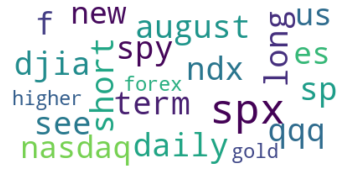

In [202]:
#general wordcloud - tweets
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(result)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("tweets_general2.png")

In [203]:
# Start with one review - almonst 10M words!
text = " ".join(review for review in tweets.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 9079245 words in the combination of all review.


In [222]:
from datetime import datetime

In [223]:
#convert all dates in datetime format so that i can extract the month
tweets.date = pd.to_datetime(tweets.date,  format='%d/%m/%Y')

In [224]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68863 entries, 0 to 68862
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      68863 non-null  datetime64[ns]
 1   username  68863 non-null  object        
 2   text      68863 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.1+ MB


In [242]:
tweets.date

0       2020-01-01
1       2020-01-01
2       2020-01-01
3       2020-01-01
4       2020-01-01
           ...    
68858   2020-07-03
68859   2020-07-03
68860   2020-07-03
68861   2020-07-03
68862   2020-07-03
Name: date, Length: 68863, dtype: datetime64[ns]

### CONSIDER SOME RELEVANT MONTHS - PERIOD OF TIME - GROUP BY

In [237]:
np.unique(tweets.date.dt.month)

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [243]:
monthlynews=tweets.groupby(tweets.date.dt.month)['text'].sum()
monthlynews=pd.DataFrame(monthlynews)

In [244]:
monthlynews.head(2)

text
date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [128]:
#monthlynews.set_index("date", inplace = True)

In [245]:
monthlynews.columns

Index(['text'], dtype='object')

In [246]:
monthlynews.index

Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='date')

In [247]:
monthlynews.to_csv( "TWEETS_MONTH.csv", index=True, encoding='utf-8-sig')

In [400]:
#df.reset_index(drop=True, inplace=True)

In [248]:
#number of news per month
tweets.groupby(tweets.date.dt.month)['text'].count()

date
1     8178
2     8155
3    13461
4    11493
5    13629
6    12940
7     1007
Name: text, dtype: int64

In [249]:
monthlynews=pd.read_csv('TWEETS_MONTH.csv')
monthlynews.columns

Index(['date', 'text'], dtype='object')